<a href="https://colab.research.google.com/github/pirumba/computer_vision/blob/main/cropsknnclassfier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 from skimage.io import imshow, imread
 from skimage.color import rgb2gray
 from skimage.filters import threshold_mean
 from skimage.morphology import closing
 from skimage.measure import label, regionprops, regionprops_table
 from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
 from sklearn.model_selection import train_test_split
 from sklearn.metrics import classification_report
 from matplotlib import pyplot as plt
 import pandas as pd
 import numpy as np
 from tqdm import tqdm 
 import os

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


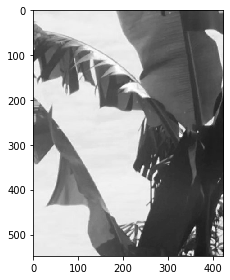

In [3]:
 # get the filenames of the leaves under the directory “Leaves”
path = "/content/drive/MyDrive/cropped/banana/"
image_path_list = os.listdir(path)
 # looking at the first image
i = 0
image_path = image_path_list[i]
image = rgb2gray(imread(path+image_path))
imshow((image))

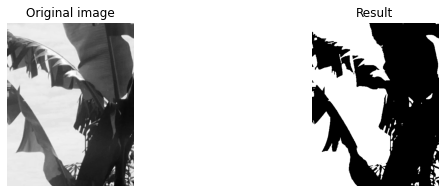

In [4]:
thresh = threshold_mean(image)
binary = image > thresh
fig, axes = plt.subplots(ncols=2, figsize=(10, 3))
ax = axes.ravel()
ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original image')

ax[1].imshow(binary, cmap=plt.cm.gray)
ax[1].set_title('Result')

for a in ax:
    a.axis('off')
plt.show()

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


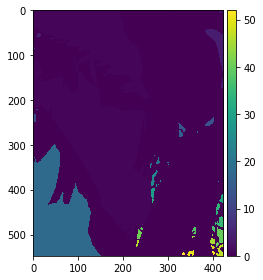

In [5]:
label_img = label(binary)
imshow(label_img)

In [6]:
table = pd.DataFrame(regionprops_table(label_img, image,
                                       ['convex_area', 'area',
                                        'eccentricity', 'extent',                   
                                        'inertia_tensor','perimeter',
                                        'major_axis_length', 
                                        'minor_axis_length']))
table['convex_ratio'] = table['area']/table['convex_area']
table['label'] = image_path[2]
table

,convex_area,area,eccentricity,extent,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-1-0,inertia_tensor-1-1,perimeter,major_axis_length,minor_axis_length,convex_ratio,label
0,96987,68393,0.914889,0.507834,4141.187518,-3910.003191,-3910.003191,18148.693382,3129.052091,553.768250,223.559431,0.705177,n
1,78,74,0.834070,0.880952,11.059167,0.086560,0.086560,3.366874,32.242641,13.302716,7.338555,0.948718,n
2,4,4,0.000000,1.000000,0.250000,-0.000000,-0.000000,0.250000,4.000000,2.000000,2.000000,1.000000,n
3,3265,1693,0.976396,0.273417,113.141307,-249.173962,-249.173962,1293.721321,342.195959,146.651010,31.674646,0.518530,n
4,86,75,0.650227,0.681818,7.284622,1.614756,1.614756,5.869156,33.727922,11.551576,8.776191,0.872093,n
5,3,3,1.000000,1.000000,0.000000,-0.000000,-0.000000,0.666667,1.000000,3.265986,0.000000,1.000000,n
6,1,1,0.000000,1.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,n
7,49,43,0.977084,0.632353,0.906436,-1.307734,-1.307734,17.666847,30.242641,16.860970,3.588902,0.877551,n
8,2,2,1.000000,1.000000,0.250000,-0.000000,-0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,n
9,6,5,0.955796,0.625000,1.040000,0.360000,0.360000,0.240000,4.207107,4.341695,1.276589,0.833333,n


In [7]:
image_path_list = os.listdir(path)
df = pd.DataFrame()
for i in range(len(image_path_list)):
   
  image_path = image_path_list[i]
  image = rgb2gray(imread(path+image_path))
  thresh = threshold_mean(image)
  binary = image > thresh
  binary = closing(binary)
  label_img = label(binary)
  
  table = pd.DataFrame(regionprops_table(label_img, image,
                          ['convex_area', 'area', 'eccentricity',
                           'extent', 'inertia_tensor',                         
                           'major_axis_length', 'minor_axis_length',
                           'perimeter', 'solidity', 'image',
                           'orientation', 'moments_central',
                           'moments_hu', 'euler_number',
                           'equivalent_diameter',
                           'mean_intensity', 'bbox']))
  table['perimeter_area_ratio'] = table['perimeter']/table['area']
  real_images = []
  std = []
  mean = []
  percent25 = []
  percent75 = []
  for prop in regionprops(label_img): 
      
      min_row, min_col, max_row, max_col = prop.bbox
      img = image[min_row:max_row,min_col:max_col]
      real_images += [img]
      mean += [np.mean(img)]
      std += [np.std(img)]
      percent25 += [np.percentile(img, 25)] 
      percent75 += [np.percentile(img, 75)]
  table['real_images'] = real_images
  table['mean_intensity'] = mean
  table['std_intensity'] = std
  table['25th Percentile'] = mean
  table['75th Percentile'] = std
  table['iqr'] = table['75th Percentile'] - table['25th Percentile']
  table['label'] = image_path[5]
  df = pd.concat([df, table], axis=0)
df.head()

,convex_area,area,eccentricity,extent,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-1-0,inertia_tensor-1-1,major_axis_length,minor_axis_length,...,bbox-1,bbox-2,bbox-3,perimeter_area_ratio,real_images,std_intensity,25th Percentile,75th Percentile,iqr,label
0,99170,68990,0.914976,0.482677,4207.109471,-4009.829817,-4009.829817,18227.591102,555.602408,224.190038,...,0,516,277,0.044628,"[[0.5975149019607844, 0.6288874509803922, 0.65...",0.263855,0.687918,0.263855,-0.424063,a
1,78,74,0.834070,0.880952,11.059167,0.086560,0.086560,3.366874,13.302716,7.338555,...,412,7,424,0.435711,"[[0.5844423529411764, 0.7085258823529411, 0.71...",0.083395,0.662967,0.083395,-0.579572,a
2,4,4,0.000000,1.000000,0.250000,-0.000000,-0.000000,0.250000,2.000000,2.000000,...,303,7,305,1.000000,"[[0.5654023529411765, 0.5726949019607843], [0....",0.008649,0.576892,0.008649,-0.568242,a
3,3266,1698,0.976701,0.274225,113.091394,-250.802380,-250.802380,1311.313668,147.604420,31.676745,...,381,187,424,0.201916,"[[0.30598039215686273, 0.37431372549019604, 0....",0.245424,0.475254,0.245424,-0.229829,a
4,86,75,0.650227,0.681818,7.284622,1.614756,1.614756,5.869156,11.551576,8.776191,...,6,62,17,0.449706,"[[0.5004611764705883, 0.47497450980392153, 0.4...",0.071088,0.574215,0.071088,-0.503127,a


In [8]:
X = df.drop(columns=['label', 'image', 'real_images'])
#features
X = X[['iqr','75th Percentile','inertia_tensor-1-1',
       'std_intensity','mean_intensity','25th Percentile',
       'minor_axis_length', 'solidity', 'eccentricity']]
#target
y = df['label']
columns = X.columns
#train-test-split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.10, random_state=123, stratify=y)

In [9]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
  
# making predictions on the testing set
y_pred = gnb.predict(X_test)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 97.85714285714285


In [10]:
print(f"Test Accuracy: {np.mean(gnb.predict(X_test) ==y_test)*100:.2f}%")

Test Accuracy: 97.86%


In [11]:
#print confusion matrix of test set
print(classification_report(gnb.predict(X_test), y_test))

              precision    recall  f1-score   support

           2       0.50      0.10      0.16        21
           a       0.98      1.00      0.99       959

    accuracy                           0.98       980
   macro avg       0.74      0.55      0.57       980
weighted avg       0.97      0.98      0.97       980



Text(0.5, 1.0, 'Accuracy Score: 97.85714285714285')

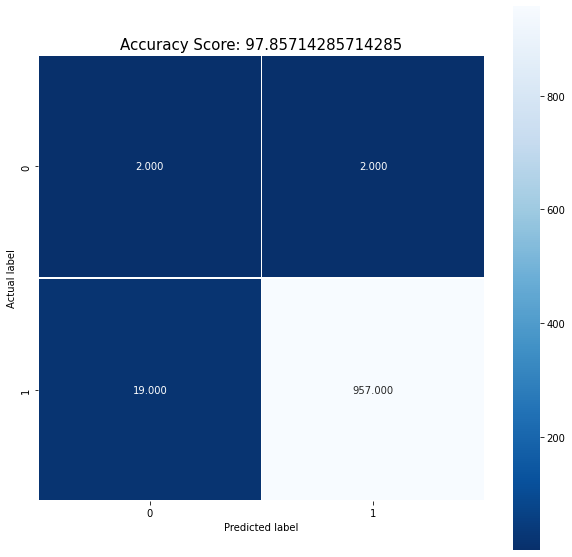

In [12]:
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix # metrics error
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,y_pred)*100)
plt.title(all_sample_title,size=15)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
KNeighborsClassifier(...)
print(knn.predict(X_test))

['a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a'
 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a'
 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a'
 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a'
 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a'
 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a'
 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a'
 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a'
 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a'
 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a'
 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a'
 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a'
 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a'
 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a

In [14]:
print(f"Test Accuracy: {np.mean(knn.score(X_test,y_test))*100:.2f}%")

Test Accuracy: 99.59%


In [15]:
print(knn.predict_proba(X_test))

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [16]:
#print confusion matrix of test set
print(classification_report(knn.predict(X_test), y_test))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         0
           a       1.00      1.00      1.00       980

    accuracy                           1.00       980
   macro avg       0.50      0.50      0.50       980
weighted avg       1.00      1.00      1.00       980



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
# make prediction on entire test data
predictions = knn.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix # metrics error
%time
# 98%
print('KNN Accuracy: %.3f' % accuracy_score(y_test,predictions))

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 10 µs
KNN Accuracy: 0.996


In [19]:
# to create nice confusion metrics
import seaborn as sns

Text(0.5, 1.0, 'Accuracy Score: 99.59183673469387')

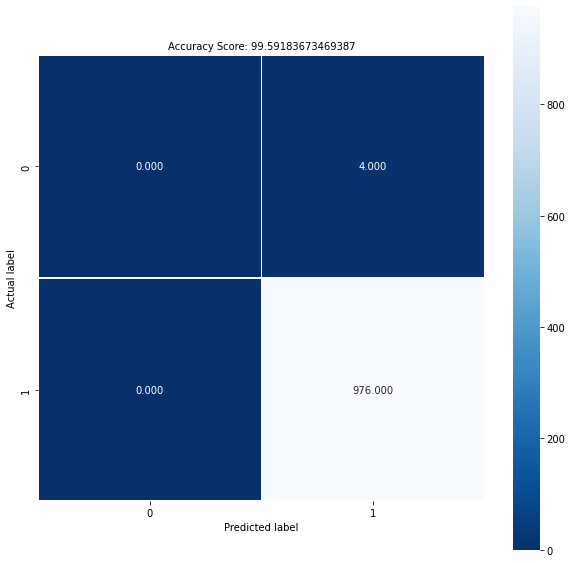

In [20]:
cm = confusion_matrix(y_test,predictions)
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,predictions)*100)
plt.title(all_sample_title,size=10)